<a href="https://colab.research.google.com/github/vedantdave77/Udacity_Nueral_network_pytorch/blob/master/RNN_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generate Data

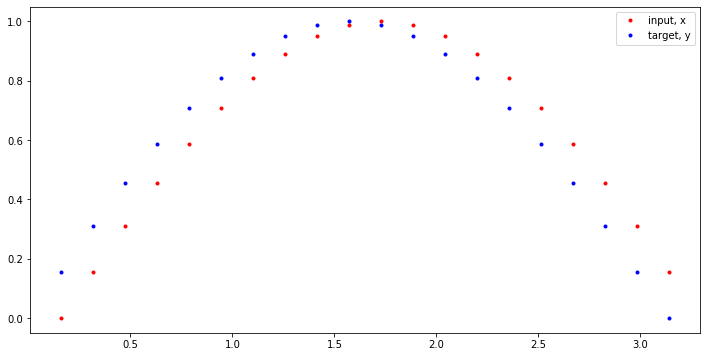

In [2]:
plt.figure(figsize=(12,6))

# how many time step pts are in one batch of data.
seq_length =20

#genrate evenly spaced data points
time_steps = np.linspace(0,np.pi,seq_length +1)
data = np.sin(time_steps)
data.resize((seq_length +1 ,1)) # size becomes as input dimension

x= data[:-1] #last piece of data
y = data[1:] # all first column data

# Display data 
plt.plot(time_steps[1:],x, 'r.', label ='input, x')
plt.plot(time_steps[1:],y,'b.',label = 'target, y')

plt.legend(loc = 'best')
plt.show()




Define RNN

In [0]:
class RNN(nn.Module):
    def __init__(self, input_size,output_size,hidden_dim,n_layers):
        super(RNN, self).__init__()
        self.hidden_dim = hidden_dim
        #internally structure rnn for specific parameters
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers,batch_first =True)
        # last fully connected layers added
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self,x,hidden):
        #x (batch_size,seq_length, input_size)
        #hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_stop, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        #change shape of output
        r_out = r_out.view(-1, self.hidden_dim)

        #get final output
        output = self.fc(r_out)

        return output, hidden


Now check the input and output dimension

In [10]:
# test dimensions 
test_rnn = RNN(input_size = 1 , output_size = 1, hidden_dim = 10 , n_layers = 2)

#generate evely space data again for checking
time_steps = np.linspace(0,np.pi, seq_length)
data = np.sin(time_steps)
data.resize((seq_length, 1))

temp_test_input = torch.Tensor(data)
print(temp_test_input.size())
test_input = torch.Tensor(data).unsqueeze(0)
print('Input size: ' , test_input.size()) 

#test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
print('output_size:',test_input.size())
print('Hidden state size:', test_h.size())


torch.Size([20, 1])
Input size:  torch.Size([1, 20, 1])
output_size: torch.Size([1, 20, 1])
Hidden state size: torch.Size([2, 1, 10])


Now, lets train RNN with specified hyper parameters

In [11]:
# decide new hyper parameters
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1

#use RNN
rnn = RNN(input_size,output_size,hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


Compute Loss and Optimization 

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(),lr = 0.01)

Define Training of RNN with back propogation.



In [0]:
# train the RNN
def train(rnn, n_steps, print_every):
    
    # initialize the hidden state
    hidden = None     
    
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data 
        time_steps = np.linspace(step * np.pi, (step+1)*np.pi, seq_length + 1)
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1)) # input_size=1

        x = data[:-1]
        y = data[1:]
        
        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()
        # perform backprop and update weights
        loss.backward()
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0:        
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.') # input
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()
    return rnn

Loss:  0.000570115284062922


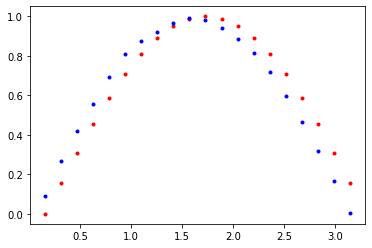

Loss:  2.4117835550896416e-07


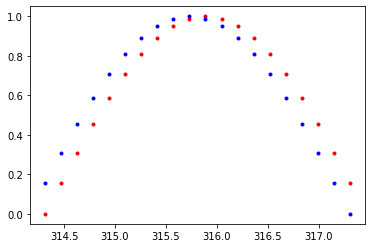

Loss:  2.7642487410162175e-08


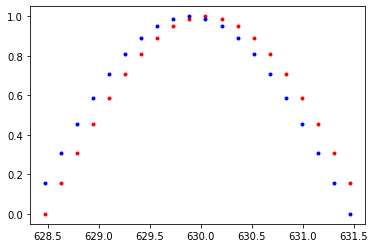

Loss:  2.685731992357887e-08


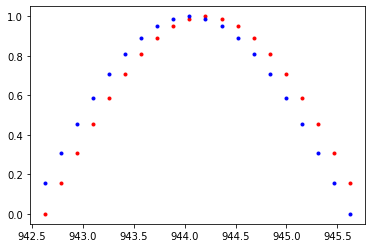

Loss:  2.8538384100329495e-08


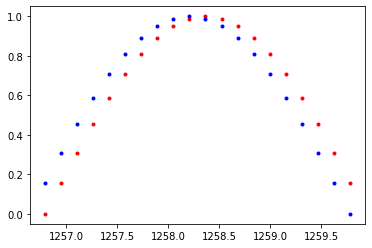

Loss:  3.001949622216671e-08


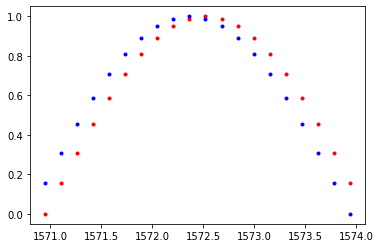

Loss:  3.1777851461356477e-08


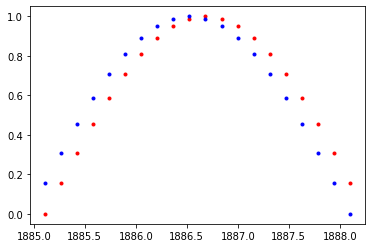

Loss:  3.39713146502163e-08


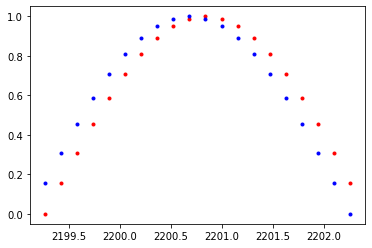

Loss:  3.941918436112246e-08


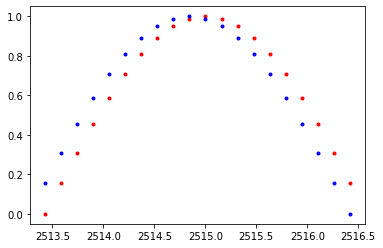

Loss:  1.4288515558291692e-05


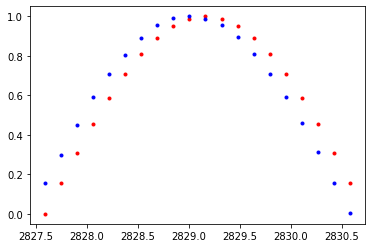

In [22]:
# train rnn and monitor the result.
n_steps = 1000
print_every = 100

trained_rnn = train(rnn , n_steps, print_every)

Time-Series Prediction.
Time-series prediction shows the future value and applied to many tasks as an Example: Weather Forcasting, predicting stock market prices and generate the prediction much further from the time,

# Keep Learning, Enjoy Empowering!